In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from core.preprocessing import decoding_numbers
from core.load_data import load_data, initalize_result_df

In [2]:
#Run this cell to load the data and create a df to save results later
#load_data()
#initalize_result_df()

In [ ]:
#initalize_result_df()

In [3]:
path = '../data/raw/2011 Census Microdata Teaching File.csv'
df = pd.read_csv(path)
df.head()

/var/folders/cf/zk30004x3v91314p4gt9qxlr0000gp/T/ipykernel_44615/4162558258.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,For terms and conditions of use visit: http://www.ons.gov.uk/ons/guide-method/census/2011/census-data/census-microdata/microdata-teaching-file/user-guide/index.html,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
1,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
2,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
3,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
4,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2


In [4]:
print(df.shape)

(569742, 18)


In [5]:
df.iloc[0,:].values.tolist()
df.columns.values 

array(['For terms and conditions of use visit: http://www.ons.gov.uk/ons/guide-method/census/2011/census-data/census-microdata/microdata-teaching-file/user-guide/index.html ',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569742 entries, 0 to 569741
Data columns (total 18 columns):
 #   Column                                                                                                                                                                 Non-Null Count   Dtype 
---  ------                                                                                                                                                                 --------------   ----- 
 0   For terms and conditions of use visit: http://www.ons.gov.uk/ons/guide-method/census/2011/census-data/census-microdata/microdata-teaching-file/user-guide/index.html   569742 non-null  object
 1   Unnamed: 1                                                                                                                                                             569742 non-null  object
 2   Unnamed: 2                                                                                          

In [7]:
df_decoded = decoding_numbers(df)
df_decoded.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
1,7394816,North East,Not communal,Married/same-sex civilpartnership couple family,Usual resident,Female,55 to 64,Married or in a registered same-sex civil part...,No,UK,Good health,White,Christian,Economically inactive: Retired,"Process, Plant and Machine Operatives",Mining and quarrying; Manufacturing; Electrici...,No code required,DE
2,7394745,North East,Not communal,Lone parent family (female head),Usual resident,Male,35 to 44,Single (never married or never registered a sa...,No,UK,Very good health,White,Christian,Economically active: Employee,"Process, Plant and Machine Operatives",Transport and storage; Information and communi...,Full-time: 49 or more hours,C2
3,7395066,North East,Not communal,Cohabiting couple family,Usual resident,Female,35 to 44,Single (never married or never registered a sa...,No,UK,Very good health,White,No religion,Economically active: Employee,"Caring, Leisure and Other Service Occupations",Human health and social work activities,Full-time: 31 to 48 hours,DE
4,7395329,North East,Not communal,Cohabiting couple family,Usual resident,Female,16 to 24,Single (never married or never registered a sa...,No,UK,Good health,White,Christian,Economically active: Employee,Sales and Customer Service Occupations,Financial and insurance activities;Intermediation,Full-time: 31 to 48 hours,C1
5,7394712,North East,Not communal,Cohabiting couple family,Usual resident,Male,45 to 54,Divorced or formerly in a same-sex civil partn...,No,UK,Very good health,White,Christian,Economically active: Employee,"Managers, Directors and Senior Officials",Wholesale and retail trade; Repair of motor ve...,Full-time: 31 to 48 hours,C1


In [8]:
#change the docstring
def overview(df):
    """Generate an overview over the dataframe.
    
    VARs
        df: the dataframe
    RETURNS:
        None
    """
    
    df = df.copy()
    display(pd.DataFrame({'dtype': df.dtypes,
                          'total': df.count(),
                          'missing_n': df.isna().sum(),
                          'missing_%': df.isna().mean()*100,
                          'uniques_n': df.nunique(),
                          'uniques': [df[col].unique() for col in df.columns]
                         }))
overview(df)

,dtype,total,missing_n,missing_%,uniques_n,uniques
For terms and conditions of use visit: http://www.ons.gov.uk/ons/guide-method/census/2011/census-data/census-microdata/microdata-teaching-file/user-guide/index.html,object,569742,0,0.0,569741,"[Person ID, 7394816, 7394745, 7395066, 7395329..."
Unnamed: 1,object,569742,0,0.0,11,"[Region, E12000001, E12000002, E12000003, E120..."
Unnamed: 2,object,569742,0,0.0,3,"[Residence Type, H, C]"
Unnamed: 3,object,569742,0,0.0,15,"[Family Composition, 2, 5, 3, 1, 6, -9, 4, 2, ..."
Unnamed: 4,object,569742,0,0.0,7,"[Population Base, 1, 2, 3, 1, 3, 2]"
Unnamed: 5,object,569742,0,0.0,5,"[Sex, 2, 1, 1, 2]"
Unnamed: 6,object,569742,0,0.0,17,"[Age, 6, 4, 2, 5, 1, 7, 3, 8, 4, 1, 5, 3, 2, 6..."
Unnamed: 7,object,569742,0,0.0,11,"[Marital Status, 2, 1, 4, 3, 5, 2, 1, 5, 3, 4]"
Unnamed: 8,object,569742,0,0.0,5,"[Student, 2, 1, 2, 1]"
Unnamed: 9,object,569742,0,0.0,7,"[Country of Birth, 1, 2, -9, 1, 2, -9]"


In [9]:
overview(df_decoded)

,dtype,total,missing_n,missing_%,uniques_n,uniques
Person ID,object,569741,0,0.0,569740,"[7394816, 7394745, 7395066, 7395329, 7394712, ..."
Region,object,569741,0,0.0,10,"[North East, North West, Yorkshire and the Hum..."
Residence Type,object,569741,0,0.0,2,"[Not communal, Communal]"
Family Composition,object,569741,0,0.0,7,[Married/same-sex civilpartnership couple fami...
Population Base,object,569741,0,0.0,3,"[Usual resident, Student living away from home..."
Sex,object,569741,0,0.0,2,"[Female, Male]"
Age,object,569741,0,0.0,8,"[55 to 64, 35 to 44, 16 to 24, 45 to 54, 0 to ..."
Marital Status,object,569741,0,0.0,5,[Married or in a registered same-sex civil par...
Student,object,569741,0,0.0,2,"[No, Yes]"
Country of Birth,object,569741,0,0.0,3,"[UK, Non UK, No Code required]"


# EDA


In [10]:
print(f'Duplicates: {df_decoded.duplicated().sum()}')

Duplicates: 0


In [11]:
def distribution_of_column(df, col_given):
    df_new = df.loc[df['Approximated Social Grade']=='DE',:].groupby(col_given)[['Person ID']].agg('count')
    df_new.columns = ['DE']
    for col in ['C2', 'C1', 'No code required', 'AB']:
        df_new[col]= df.loc[df['Approximated Social Grade']== col,:].groupby(col_given)[['Person ID']].agg('count')
    df_new['Count']=df_new['DE']+df_new['C1']+df_new['C2']+df_new['AB']+df_new['No code required']
    for col in ['DE', 'C2', 'C1', 'No code required', 'AB']:
        df_new[col + '_perc']=df_new[col]/df_new['Count']
    return df_new

In [12]:
def plot_parts(df, col_given):
    df_new = distribution_of_column(df, col_given)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    bottom = np.full(df_new.shape[0], 0)
    bottom_perc = np.full(df_new.shape[0], 0)
    for col in ['DE', 'C2', 'C1', 'No code required', 'AB']:
        ax[0].bar(x = df_new.index, height = df_new[col].values, bottom=bottom, width = 0.8)
        bottom = bottom + df_new[col].values
        ax[0].set_title(col_given)
        ax[0].legend(['DE', 'C2', 'C1', 'No code required', 'AB'])
        ax[0].set_xticklabels(df_new.index, rotation=90)
        ax[1].bar(x = df_new.index, height = df_new[col + '_perc'].values, bottom=bottom_perc, width = 0.8)
        bottom_perc = bottom_perc + df_new[col+ '_perc'].values
        ax[1].set_title(col_given)
        ax[1].legend(['DE', 'C2', 'C1', 'No code required', 'AB'])
        if col_given in ['Region', 'Family Composition', 'Age', 'Marital Status', 'Health', 
                         'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation', 
                         'Industry', 'Hours worked per week']:
            ax[0].set_xticklabels(df_new.index, rotation=90)
            ax[1].set_xticklabels(df_new.index, rotation=90)
        else:
            ax[0].set_xticklabels(df_new.index, rotation=0)
            ax[1].set_xticklabels(df_new.index, rotation=0)
    return df_new

/var/folders/cf/zk30004x3v91314p4gt9qxlr0000gp/T/ipykernel_44615/789248263.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_new.index, rotation=90)
/var/folders/cf/zk30004x3v91314p4gt9qxlr0000gp/T/ipykernel_44615/789248263.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_new.index, rotation=90)
/var/folders/cf/zk30004x3v91314p4gt9qxlr0000gp/T/ipykernel_44615/789248263.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(df_new.index, rotation=90)
/var/folders/cf/zk30004x3v91314p4gt9qxlr0000gp/T/ipykernel_44615/789248263.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0]

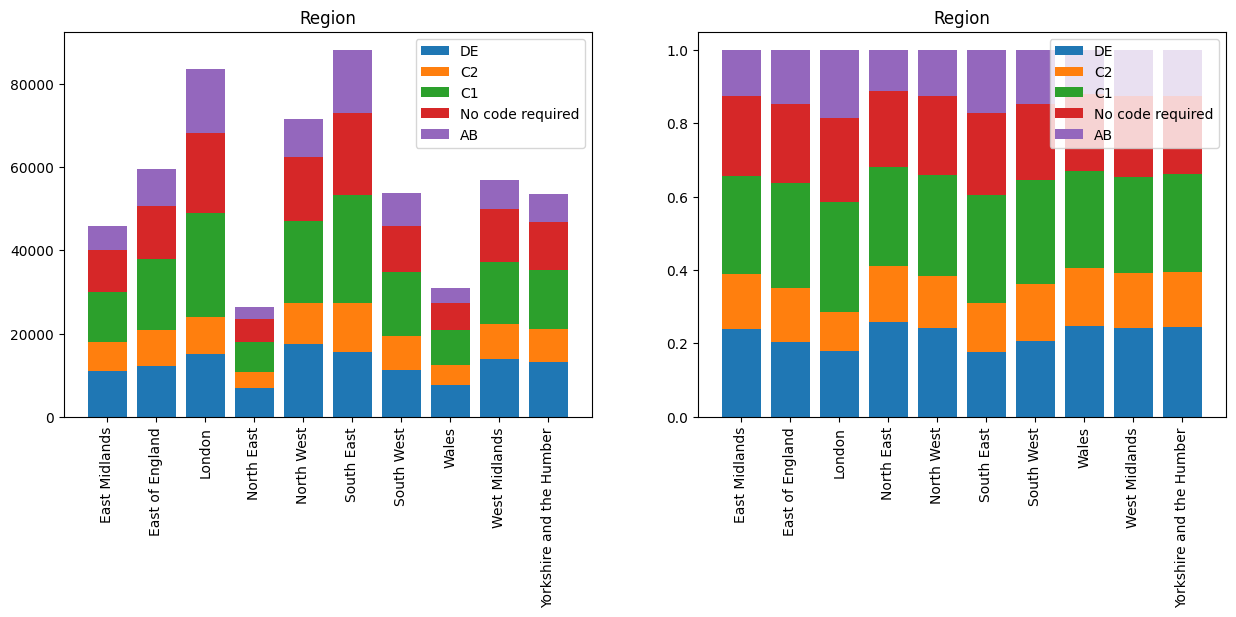

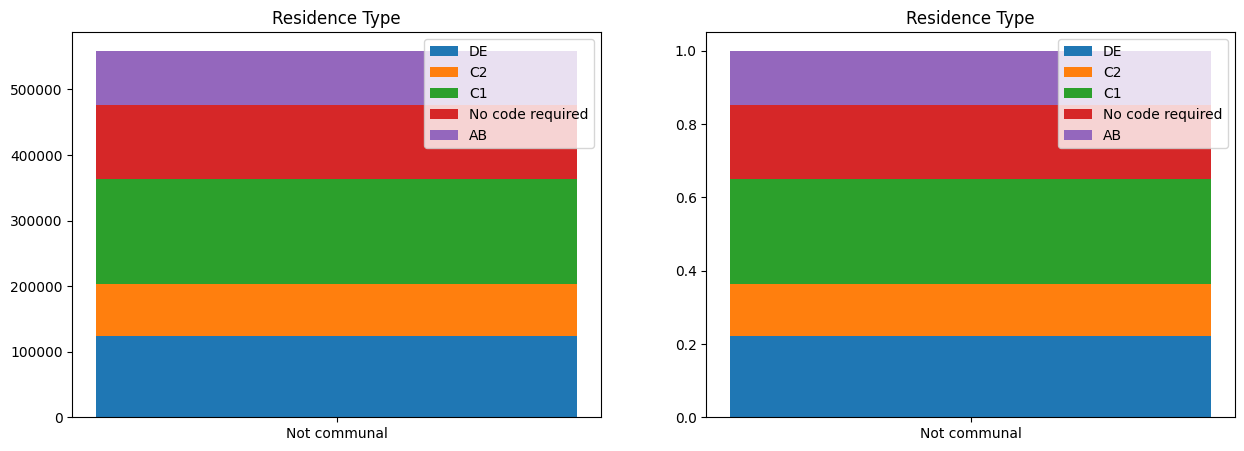

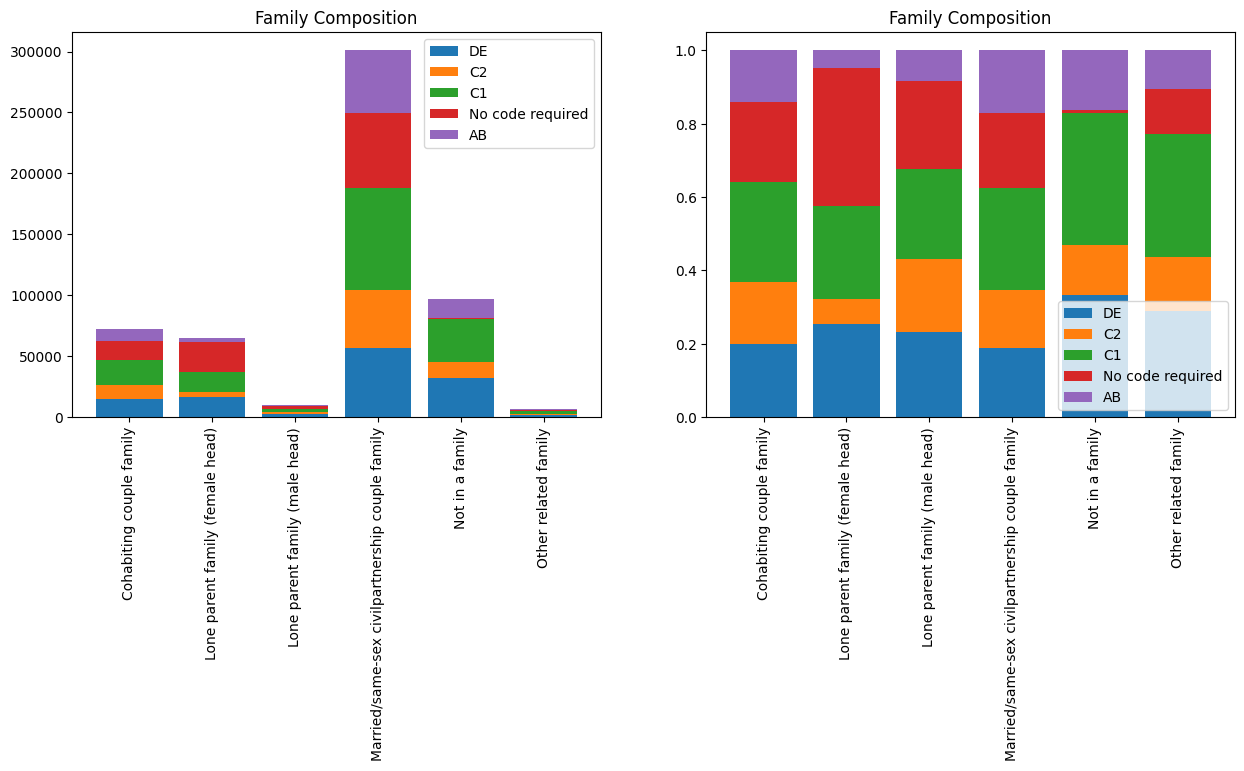

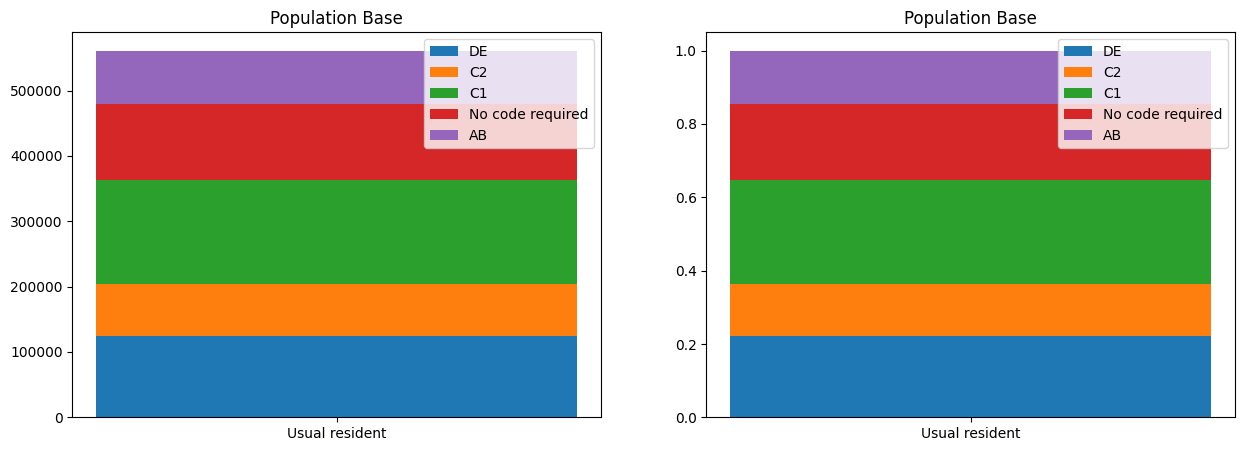

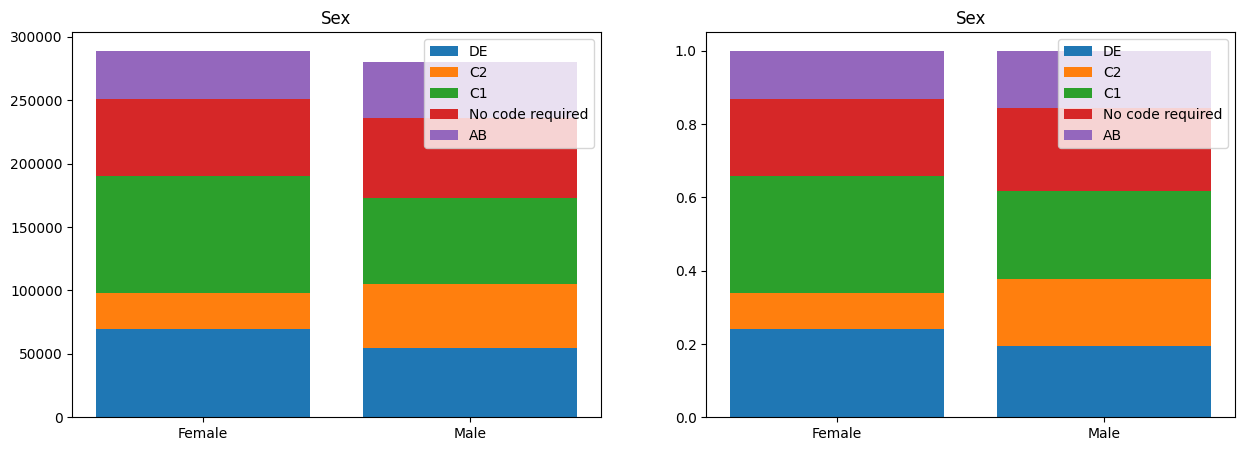

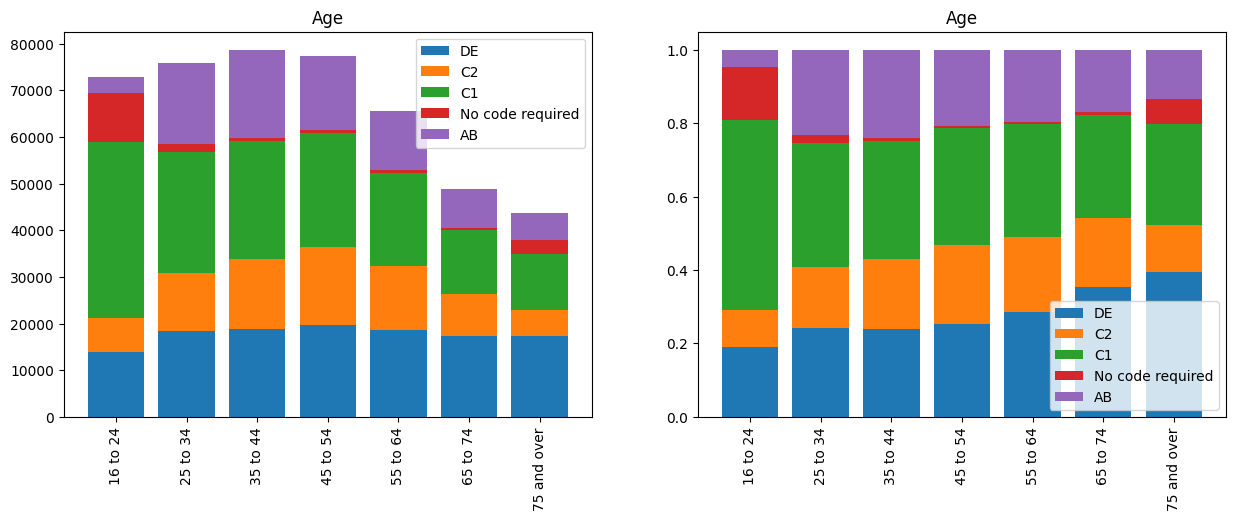

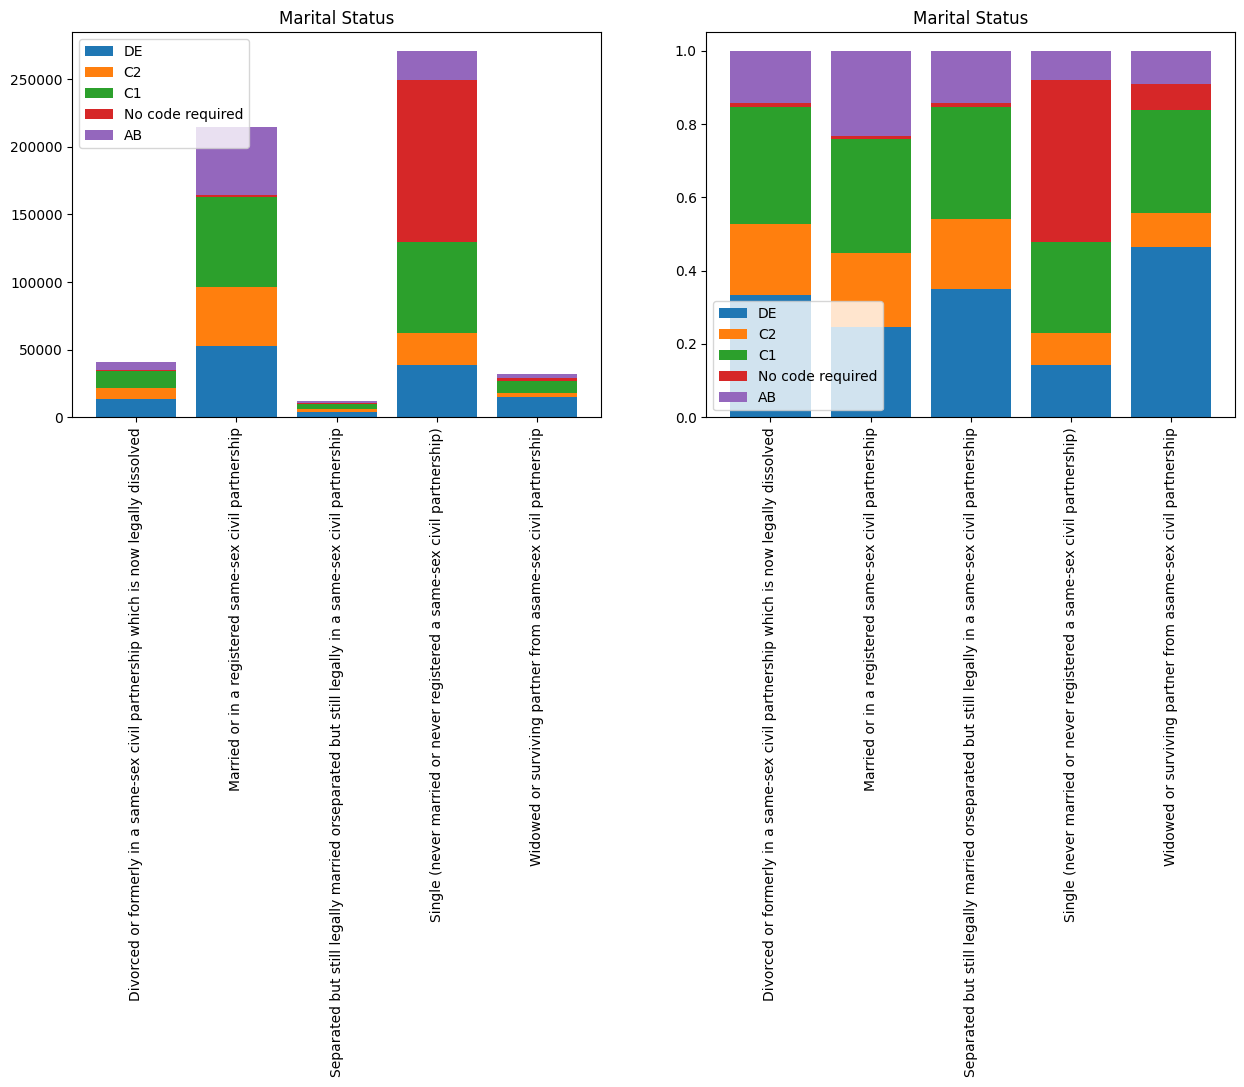

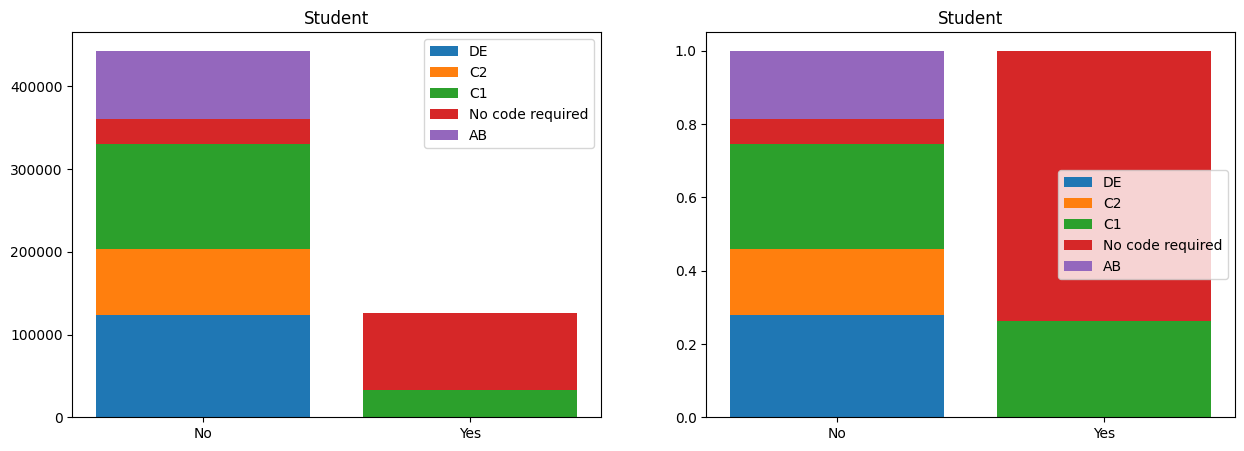

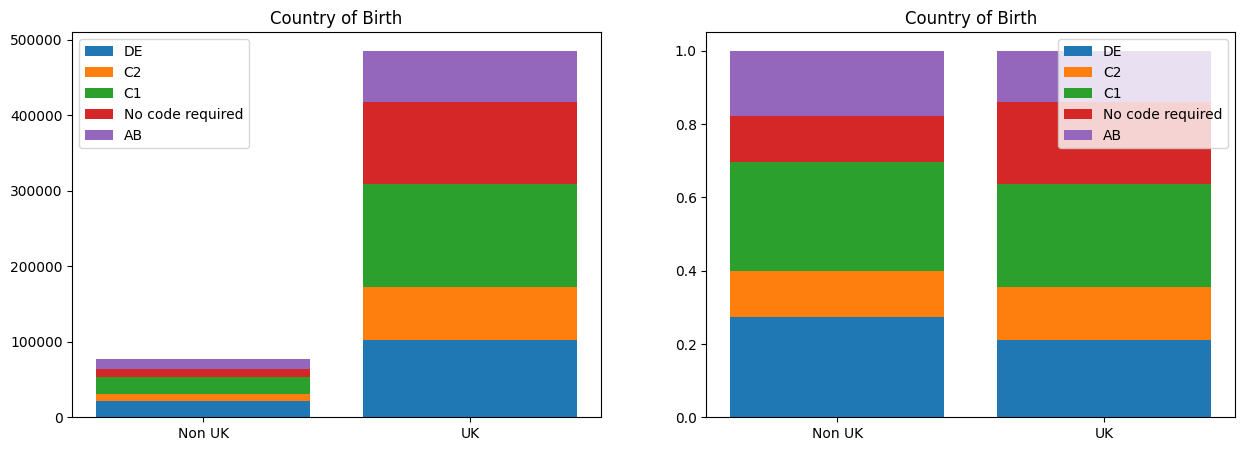

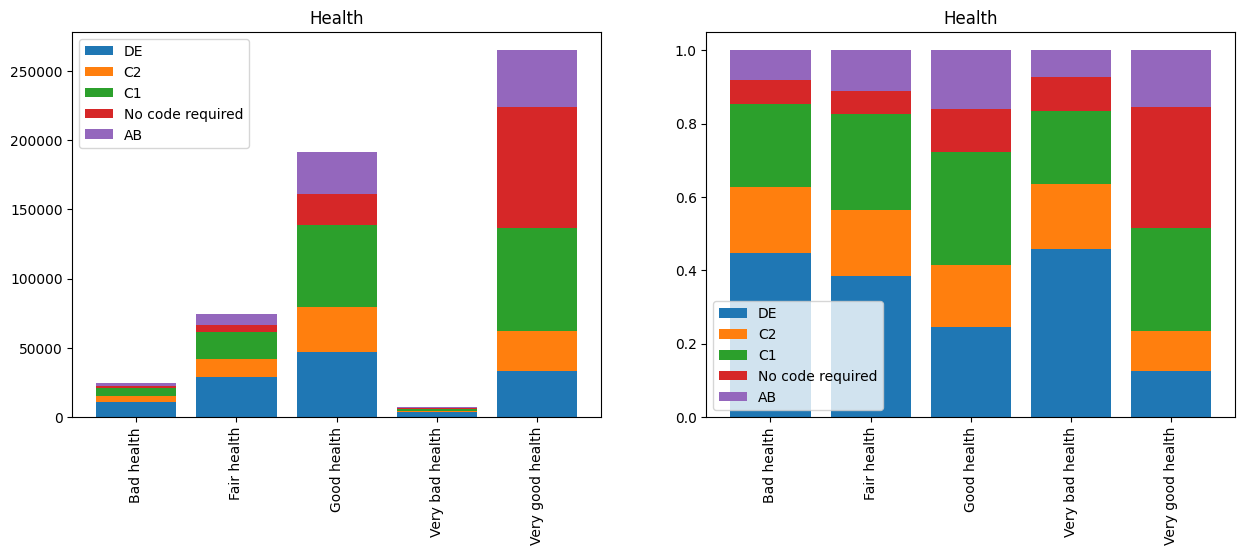

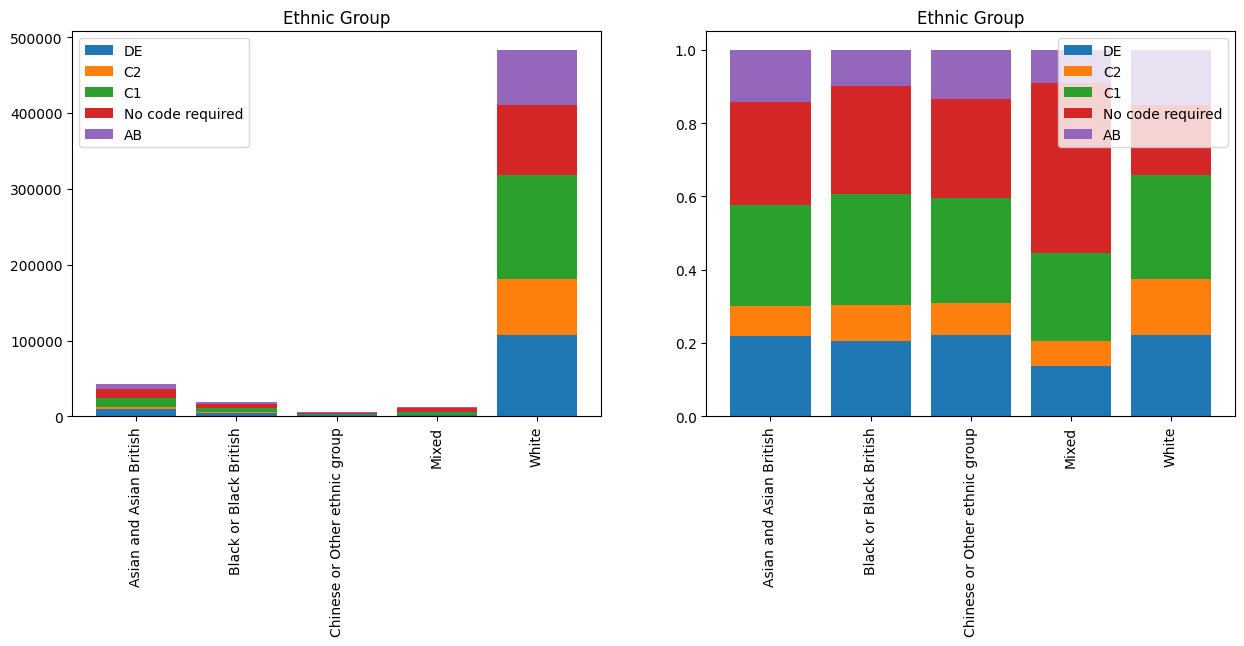

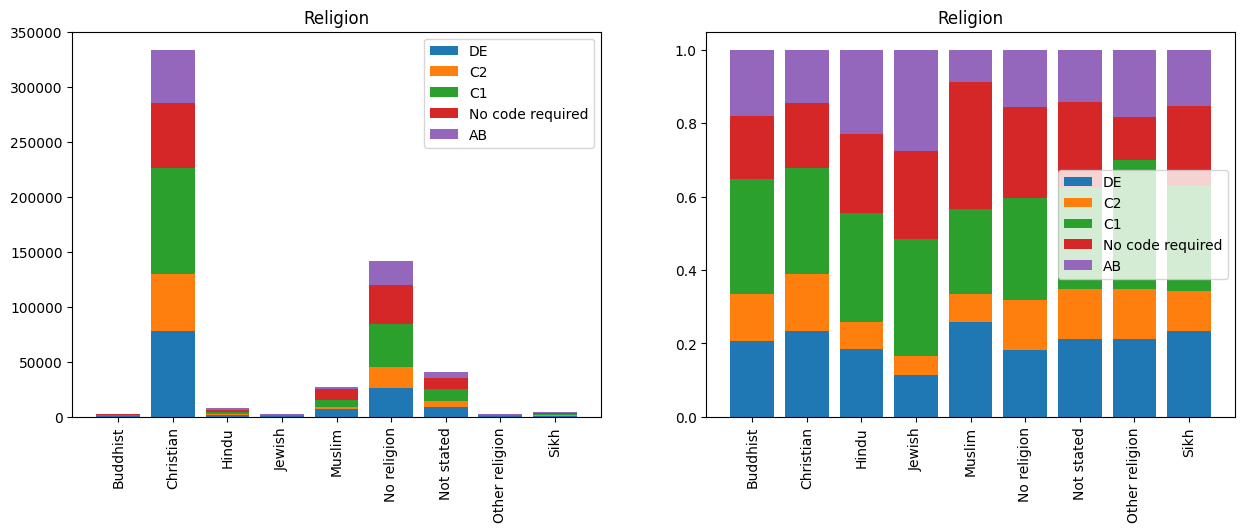

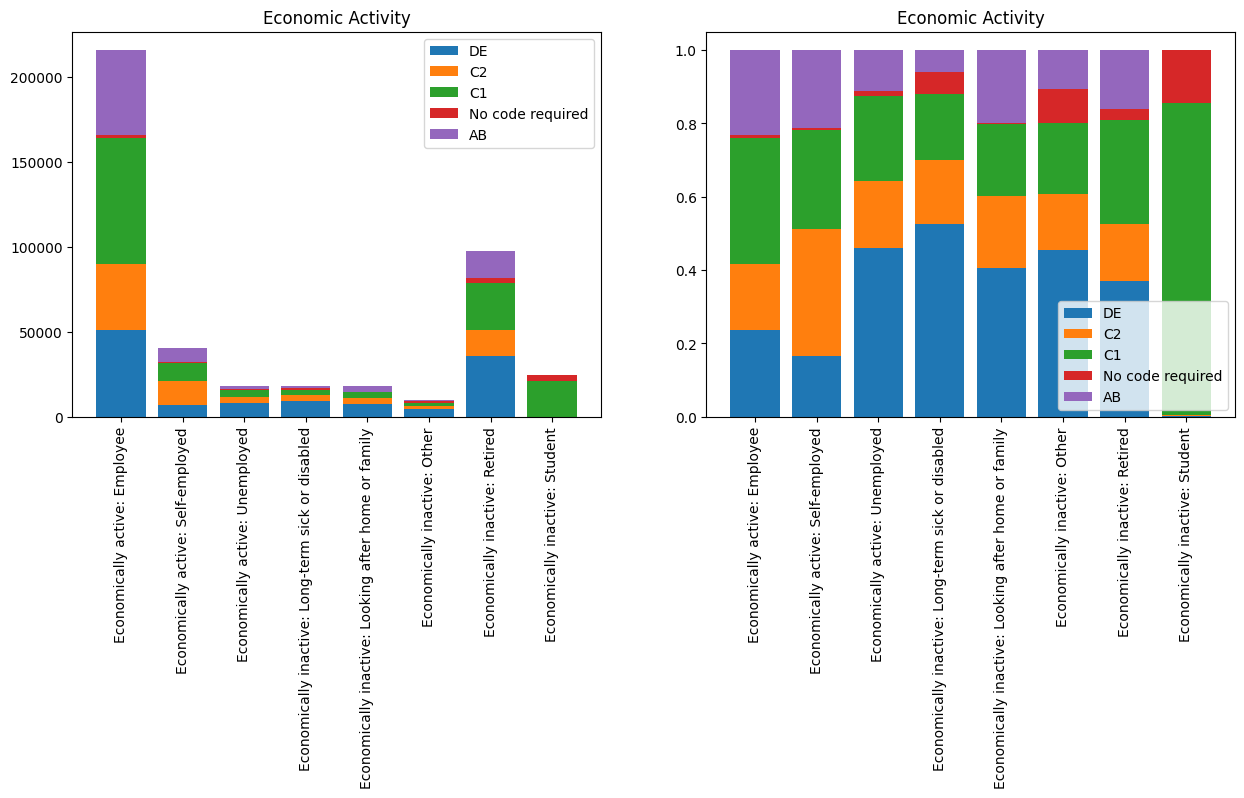

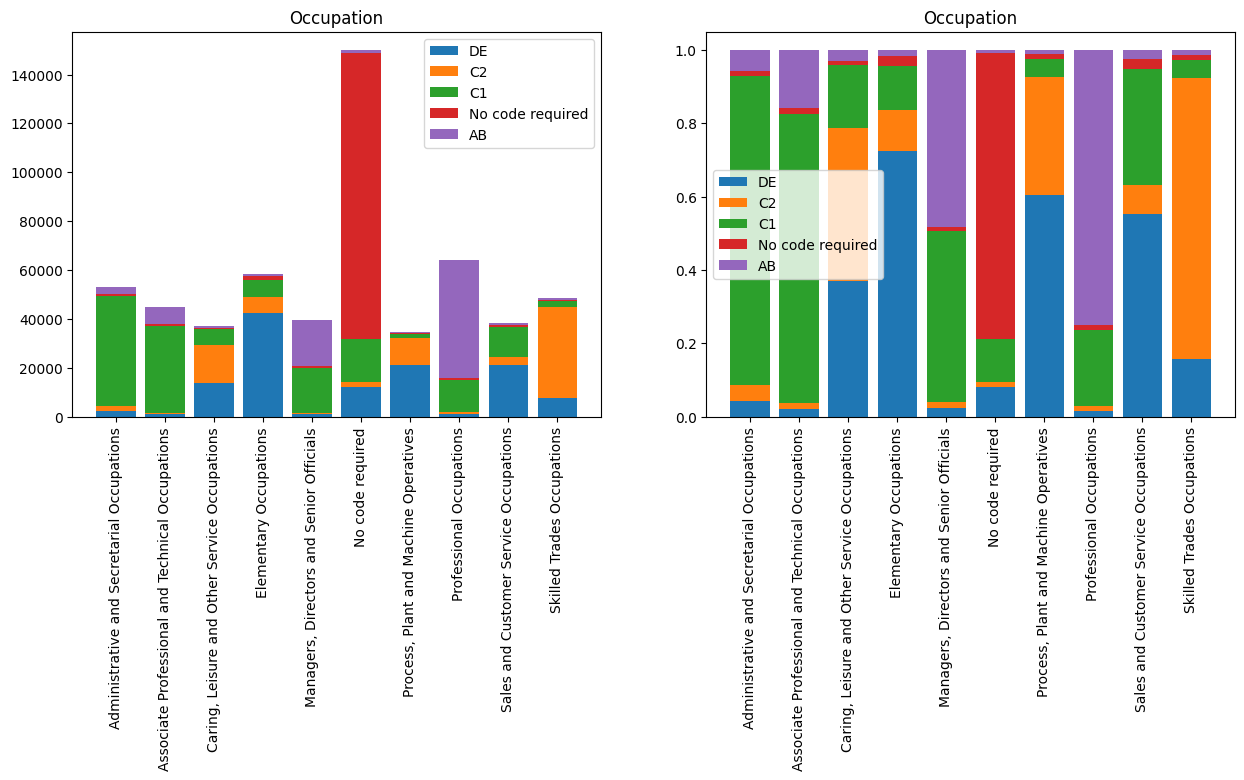

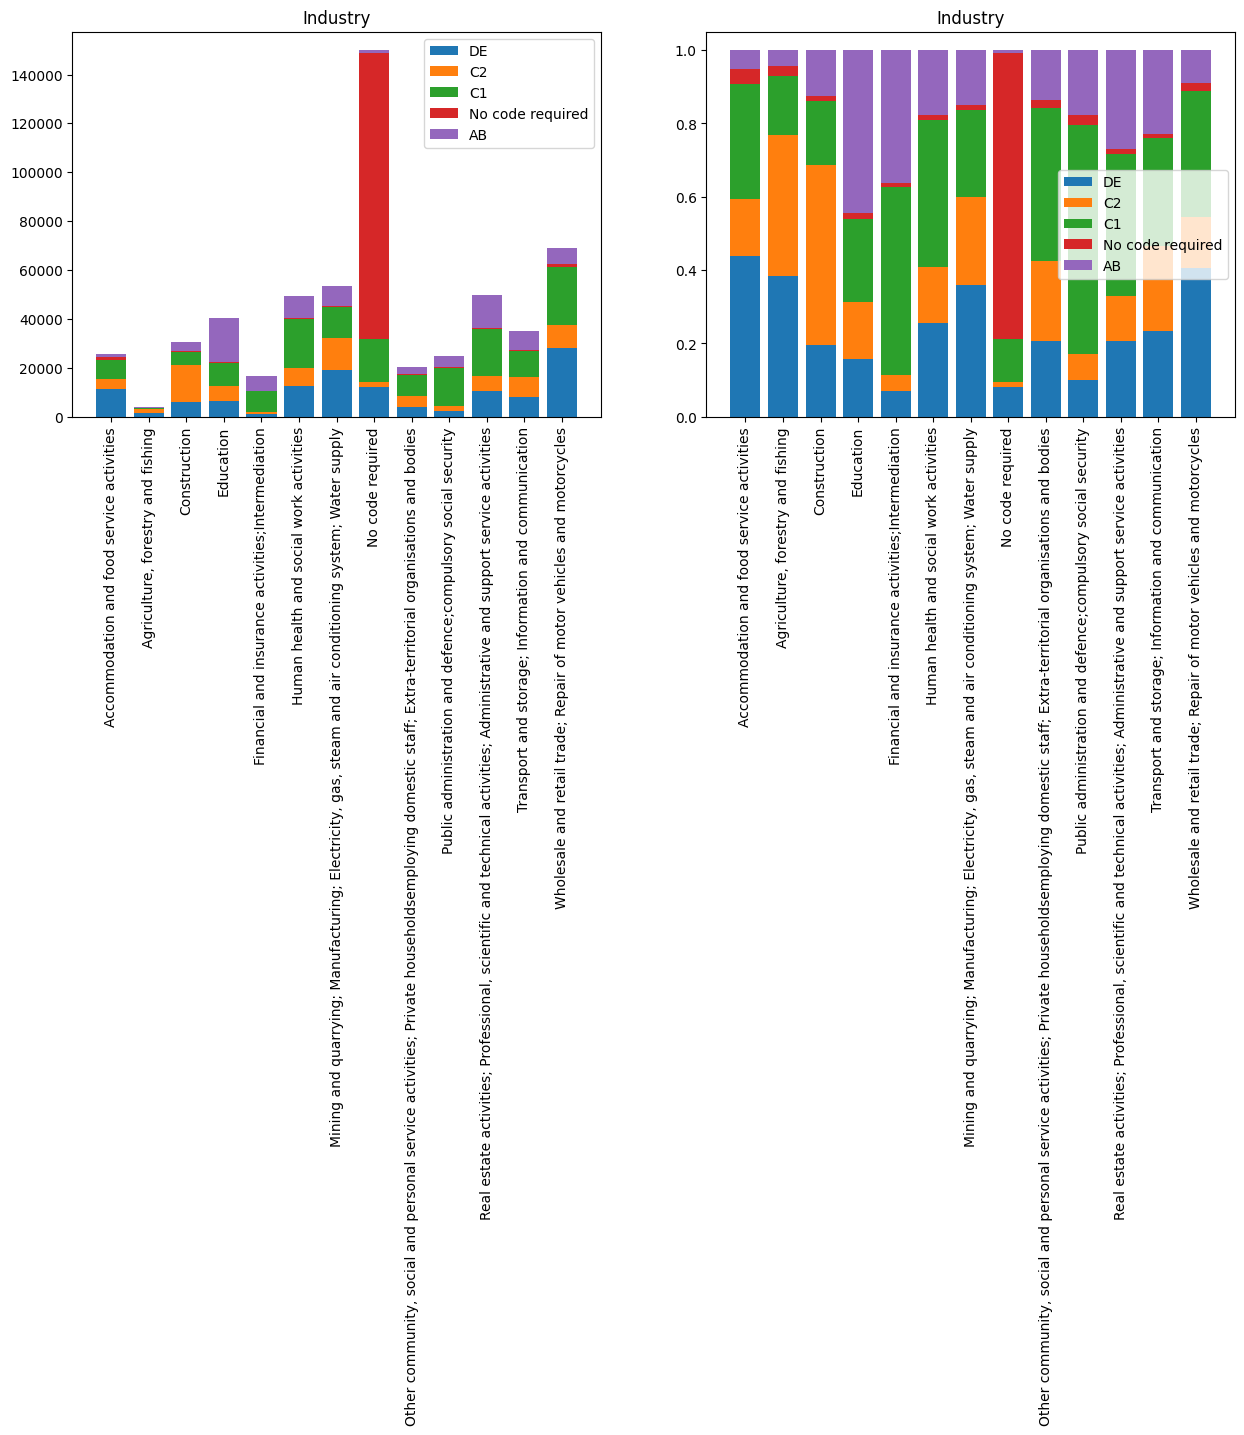

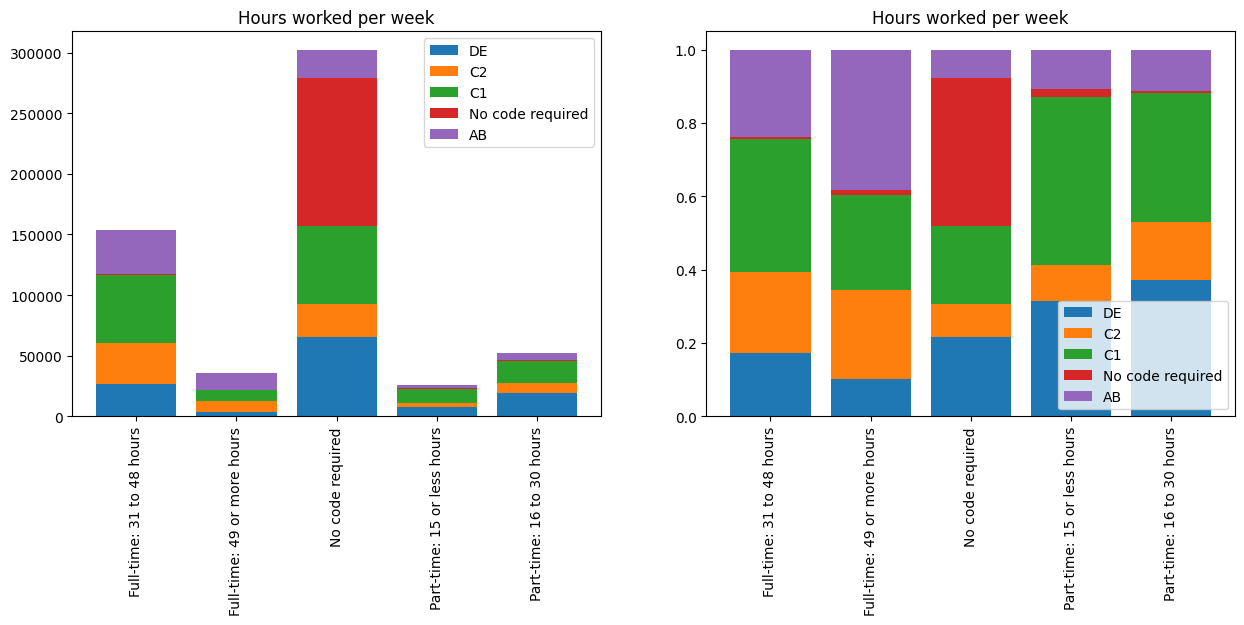

In [13]:
for col in ['Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry',
       'Hours worked per week']:
    plot_parts(df_decoded, col)